## ASSIGNMENT 3

## Linear models for classification problems

Classification — The act of dividing an input space into a collection of labelled regions using decision boundaries. 

Linear Approach — Use of a straight line to partition a dataset. Intuitively this is easiest in terms of both describing the partition (“If it falls on one side of the line class as A, if it falls on the side class as B”) and performing the cut [1]. 

An example of discriminative training of linear classifiers is Logistic Regression [2].

Logistic regression—maximum likelihood estimation of $\vec{\mathbf{w}}$ assuming that the observed training set was generated by a binomial model that depends on the output of the classifier.

This assignment has 2 parts as follows:

**Part 1.** You will implement your own classifier for **Logistic Regression** (50 points) for 2 class classification using the dataset provided for Part 1 (pls. check the shared files). Check the performance of this algorithm with the classification accuracy.

**Part 2.** You will implement your own **Multinomial Logistic Regression** (50 points) classifier for multiclass data. The multinomial logistic regression algorithm is an extension to the logistic regression model that involves changing the loss function to cross-entropy loss and predicting the probability distribution as a multinomial probability distribution to natively support multi-class classification problems [3]. Check the performance of this algorithm with the classification accuracy.

**_Preprocessing the datasets_**:

**Encoding**

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. You can use One-Hot Encoding is available in the scikit-learn Python machine learning library via the OneHotEncoder class[4]. 

**Data standardization [5]**

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. One of the most popular techniques for scaling numerical data prior to modeling is standardization. 

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values ($\mu$) is 0 and the standard deviation ($\sigma$) is 1. A value is standardized as follows:

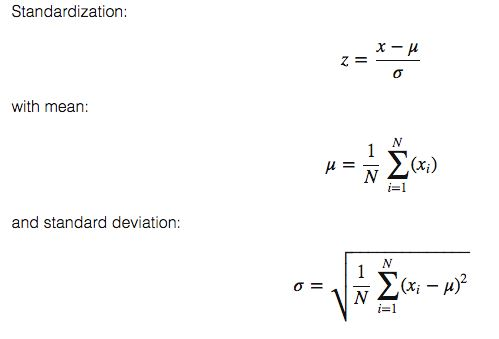

This can be thought of as subtracting the mean value or centering the data.

**Important Remarks:**

You are provided the necessary preprocessing codes as separate notebooks for both datasets that you are going to work with in this assignment. Please check the shared notebooks first before beginning to work with your own algorithms. Note that, in these notebooks, you are also provided with the binary and multinomial logistic regression performances of  of the sklearn library as a baseline for your own implementations. You will be implementing your own solutions that comprise of the necessary training procedures and the codes to train your models for each part before submission.  

**Steps for all parts:**

- Check the data has any null values or not. 
- Check if in the data, some of our columns have numeric values and some of them have categorical values.  To work with categorical variables you need to encode them to prepare this data for the machine learning algorithms.
- Split your data into train and test sets with a ratio of 80:20 with seed=1.
- Apply the data standardization technique to the datasets to standardize the input variables.
- Build your models with your own implemenation (with proper comments and explanations) using the training set.
- Report these classification models according to their accuracy over the test set. Comment on their classification performance.
- Finally, plot confusion matrices for your models over the test set, and comment on the outcomes.



[1]: https://towardsdatascience.com/classification-a-linear-approach-part-1-b080c13992dd

[2]: https://en.wikipedia.org/wiki/Linear_classifier

[3]: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

[4]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

[5]: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [17]:
# Code here for data loading and preprocessing (You can enlarge the cell as much as you want.)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Libraries
import math
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = 0, 0, 0, 0
cols = []


# these functions are gained with the aid of the supplied ipynb files.
def object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)
            
def outlier_hunt(df):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers


# this function normalize the columns and label some of the columns if needed
def prepare_data(data, y_label):
    
    global X_train, X_test, y_train, y_test
    
    obj_col = object_cols(data)
    num_col = numerical_cols(data)
    
    if y_label in num_col:
        num_col.remove(y_label)

    le = LabelEncoder()
    norm = Normalizer()

    for col in obj_col:
        data[col] = le.fit_transform(data[col])

    data[num_col] = norm.fit_transform(data[num_col])

    X_data = data.drop([y_label], axis = 1)
    y_data = data[y_label]

    # data split process is here
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=1)
    
    cols.clear()
    for i in X_train:
        cols.append(i)

I didn't use gradient descent but gradient ascent. I just want to try some other ways. You can find the source I used top of the code section below. I also want to mention the functions I used. Since multinomial logistic regression is composed of little logistic regression parts, I implement some of the functions that handles the both of the section's jobs properly.

Accuracy: 74.5103700495645


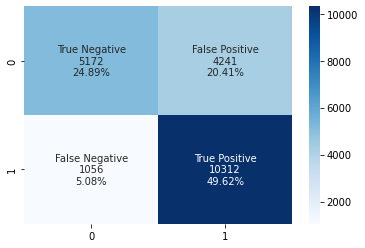

In [18]:
# Code here for Logistic Regression (You can enlarge the cell as much as you want.)

# I utilized the document below, and with the aid of this, I coded
# https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/220-logistic-regression.pdf

# Data gets rid of empty cells and splitting into 2 parts as test and train in here
data = pd.read_csv('Part1_Invistico_Airline.csv')
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())
prepare_data(data, "satisfaction")

col_len = len(X_train.columns)
gradients = [1 for i in range(0,col_len)]  # all the gradients values are initialized as 1
learning_rate = 0.05                       # learning rate is here

# sigmoid function is calculated here
def sigmoid_fnc(z):
    return 1/(1+math.exp(-z))

# linear function is computed here and after that it will be passed as a parameter in sigmoid function
def compute_z_value(gradients, lst, bias=0):
    sum = 0
    for i in range(0, len(gradients)):
        sum += gradients[i]*lst[i]         # gradients are indicates the coefficients that we are trying to predict
    return sum + bias
    

# this function simply predicts the optimum values for the gradients
# since multinomial logistic regression also uses this function I added is_it_multinomial variable with the default value False
# I also added gradient_num which is explained below
def find_optimum_gradients(gradients, is_it_multinomial=False, gradient_num=0):
    
    global learning_rate
    
    # all the input data is iterated here to train our gradient values
    for i in range(0, len(X_train)):
        temp = X_train.iloc[i]
        tList = []              # this function stores the column data of a single row
        for k in cols:
            tList.append(temp[k])
        
        z_val = compute_z_value(gradients, tList)   # z value is computed here (y = x1*w1+x2*w2....xh*wh)
        true_value = y_train.iloc[i]                # true value of the input is stored
        
        # this part is written for the multinomial logistic regression operation
        # if the gradient index we are deal with is equal to the type number (which indicates the type of glass in this case)
        # then assign the true value as 1, otherwise assign it as 0
        # it is crucial
        if is_it_multinomial:
            if gradient_num == true_value:
                true_value = 1
            else:
                true_value = 0
        
        # gradient values are optimized in here
        for k in range(0, len(gradients)):
            gradients[k] = gradients[k] + (learning_rate * (tList[k] * (true_value - sigmoid_fnc(z_val))))
        

# bias value(w0) is computed here by taking the mean of all other bias values
# y = (w1+w2+...+wh) / h
def compute_bias(gradients):
    bias = 0
    for i in gradients:
        bias += i
    return bias / len(gradients)
        

# prediction is processed here
# in here, simply we classify the test data using the sigmoid function as an activation function
def predict(lst):
    global bias
    
    z_val = compute_z_value(gradients, lst, bias)
    predicted_val = sigmoid_fnc(z_val)
    
    if z_val >= 0.5:  # if prediction value is bigger than 0.5 than assign it as a member of class 1, otherwise class 2
        return 1
    else:
        return 0

def test_and_print(is_it_multinomial=False):
    correct_ones = 0
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(0, len(X_test)):
        temp = X_test.iloc[i]
        input_vector = []
        for k in cols:
            input_vector.append(temp[k])
            
        if is_it_multinomial:
            if predict_multinomial(input_vector) == y_test.iloc[i]:
                correct_ones += 1
        else:
            if predict(input_vector) == 1:
                if y_test.iloc[i] == 1:
                    TP += 1
                else:
                    FP += 1
            else:
                if y_test.iloc[i] == 1:
                    FN += 1
                else:
                    TN += 1
        
    # this part tables the confision matrix for logistic regression
    if not is_it_multinomial:
        correct_ones = TP + TN
        confusion_matrix = np.zeros((2, 2))
        confusion_matrix[0][0] = TN
        confusion_matrix[0][1] = FP
        confusion_matrix[1][0] = FN
        confusion_matrix[1][1] = TP
        group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
        group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
            
    print("Accuracy: " + str((correct_ones*100) / len(y_test)))
    

find_optimum_gradients(gradients)  # training the gradient values
bias = compute_bias(gradients)     # calculate the bias value
test_and_print()                   # test with the test data and print the result

Since confusion matrix is used for binary classification I didn't want to make for all of the types(it indicates the type of the glasses, y values in the other words), instead I printed only the accuracy for this section.

In [19]:
# Code here Multinomial Logistic Regression (You can enlarge the cell as much as you want.)

# I utilized the document below, and with the aid of this, I coded
# https://sebastianraschka.com/pdf/lecture-notes/stat453ss21/L08_logistic__slides.pdf
# https://youtu.be/L0FU8NFpx4E?t=865

# data is readed and cleaned and finally splitted in here
data = pd.read_csv('Part2_glass.csv')
prepare_data(data, "Type")

# we have now multiple gradient vectors and baises, because we using multinomial one now but logic is similar though
learning_rate = 0.3
all_weights = []
biases = []

# optimizing the gradient vectors like part 1
def predict_multinomial(input_vector):
    
    global all_weights, biases
    predict_lst = []
    for i in range(0, len(all_weights)):
        predict_lst.append(compute_z_value(all_weights[i], input_vector, biases[i]))
    
    maxValue = max(predict_lst)
    return predict_lst.index(maxValue)+1


# gradient vectors are initialized
for i in range(0, 7):
    gradients = [1 for i in range(0, len(X_train.columns))]
    all_weights.append(gradients.copy())

# optimizing the gradient vectors and biases by calling the related functions
for i in range(0, len(all_weights)):
    find_optimum_gradients(all_weights[i], is_it_multinomial=True, gradient_num=i+1)
    biases.append(compute_bias(all_weights[i]))
    
# testing with the test data and printing the result
test_and_print(is_it_multinomial=True)

Accuracy: 51.42857142857143
